# DBTL 1 data analysis

This notebook analyzes OD340 and OD600 data from DBTL cycle 1 of a flaviolin producing P. putida.

## Inputs and outputs

#### Required file to run this notebook:
   - edd slug


#### File generated by running this notebook:
   
 
    
The files are stored in the user defined directory.

## Setup

Importing needed libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

import edd_utils as eddu

### User parameters

In [2]:
CYCLE = 2

user_params = {
    'output_file_path': f'../data/flaviolin/DBTL{CYCLE}', # Folder for output files,
    'study_slug': 'combinatorial-media-for-flaviolin-dbtl2',
    'edd_server': 'edd.jbei.org',
    'username': 'incha',
#     'study_file': f'../data/flaviolin/DBTL{CYCLE}/Combinatorial media for flaviolin DBTL0.3.csv',
    } 

In [3]:
study_slug = user_params['study_slug']
edd_server = user_params['edd_server']
username = user_params['username']

## Load the study

In [4]:
try:
  session = eddu.login(edd_server=edd_server, user=username)
except:
  print('ERROR! Connection to EDD failed. We will try to load data from disk...')
else:
  print('OK! Connection to EDD successful. We will try to load data from EDD...')

Password for incha:  ······················


OK! Connection to EDD successful. We will try to load data from EDD...


In [5]:
df: pd.DataFrame
    
try:
    df = eddu.export_study(session, study_slug, edd_server=edd_server)
except (NameError, AttributeError, KeyError):
    try:
        df = pd.read_csv(user_params['study_file'])
    except:
        print(f'ERROR! Alternative loading of data from disk failed!')
    else:
        print(f'OK! Alternative loading of data from disk was successful.')


  0%|          | 0/96 [00:00<?, ?it/s]

In [6]:
df.head()

,Study ID,Study Name,Line ID,Line Name,Line Description,Protocol,Assay ID,Assay Name,Formal Type,Measurement Type,Compartment,Units,Value,Hours
0,148349,Combinatorial media for flaviolin DBTL2,148350,C2_WA1_A4-R1,"MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0270,...",OD600,148398,C2_WA1_A4-R1,NaN,Optical Density,0,NaN,0.112,48.0
1,148349,Combinatorial media for flaviolin DBTL2,148351,C2_WA1_A4-R2,"MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0270,...",OD600,148399,C2_WA1_A4-R2,NaN,Optical Density,0,NaN,0.128,48.0
2,148349,Combinatorial media for flaviolin DBTL2,148352,C2_WA1_A4-R3,"MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0270,...",OD600,148400,C2_WA1_A4-R3,NaN,Optical Density,0,NaN,0.171,48.0
3,148349,Combinatorial media for flaviolin DBTL2,148353,C2_WA1_A4-R4,"MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0270,...",OD600,148401,C2_WA1_A4-R4,NaN,Optical Density,0,NaN,0.176,48.0
4,148349,Combinatorial media for flaviolin DBTL2,148354,C2_WA5_A8-R1,"MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0012,...",OD600,148402,C2_WA5_A8-R1,NaN,Optical Density,0,NaN,0.079,48.0


Drop unnecessary columns:

In [7]:
df = df.loc[:,['Line Name','Line Description','Protocol','Value']]
df.head()

,Line Name,Line Description,Protocol,Value
0,C2_WA1_A4-R1,"MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0270,...",OD600,0.112
1,C2_WA1_A4-R2,"MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0270,...",OD600,0.128
2,C2_WA1_A4-R3,"MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0270,...",OD600,0.171
3,C2_WA1_A4-R4,"MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0270,...",OD600,0.176
4,C2_WA5_A8-R1,"MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0012,...",OD600,0.079


In [8]:
find_row = lambda x: x['Line Name'][4]
find_col = lambda x: int(x['Line Name'][-1]) if int(x['Line Name'][5]) < 5 else int(x['Line Name'][-1])+4


In [9]:
df['Row'] =  df.apply(find_row, axis=1)
df['Column'] =  df.apply(find_col, axis=1)


In [10]:
df.head()

,Line Name,Line Description,Protocol,Value,Row,Column
0,C2_WA1_A4-R1,"MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0270,...",OD600,0.112,A,1
1,C2_WA1_A4-R2,"MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0270,...",OD600,0.128,A,2
2,C2_WA1_A4-R3,"MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0270,...",OD600,0.171,A,3
3,C2_WA1_A4-R4,"MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0270,...",OD600,0.176,A,4
4,C2_WA5_A8-R1,"MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0012,...",OD600,0.079,A,5


## Coefficient of variation

In [11]:
df_red = df.drop(columns=['Column'])
stats = df_red.groupby(['Protocol', 'Line Description']).mean()
stats.rename(columns={'Value': 'mean'}, inplace=True)
stats['std'] = df_red.groupby(['Protocol', 'Line Description']).std()
stats['CV[%]'] = 100* stats['std'] / stats['mean']
stats

mean  \
Protocol Line Description                                               
OD340    MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0007, ...  0.144400   
         MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0007, ...  0.258300   
         MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0012, ...  0.369575   
         MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0014, ...  0.366975   
         MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0022, ...  0.462625   
         MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0025, ...  0.302725   
         MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0033, ...  0.185900   
         MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0039, ...  0.296000   
         MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0187, ...  0.276900   
         MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0206, ...  0.421450   
         MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0270, ...  0.376275   
         MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0394, ...  0.189200   
OD600    MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0007, ...  0.349000   
         MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0007, ...  0.858750   
         MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0012, ...  0.072250   
         MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0014, ...  0.235500   
         MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0022, ...  0.346250   
         MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0025, ...  0.096750   
         MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0033, ...  0.525750   
         MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0039, ...  0.624000   
         MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0187, ...  1.122750   
         MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0206, ...  0.291750   
         MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0270, ...  0.146750   
         MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0394, ...  1.015500   

                                                                  std  \
Protocol Line Description                                               
OD340    MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0007, ...  0.016546   
         MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0007, ...  0.007331   
         MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0012, ...  0.004211   
         MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0014, ...  0.004211   
         MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0022, ...  0.012411   
         MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0025, ...  0.002692   
         MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0033, ...  0.004908   
         MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0039, ...  0.004403   
         MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0187, ...  0.004141   
         MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0206, ...  0.011890   
         MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0270, ...  0.006749   
         MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0394, ...  0.009721   
OD600    MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0007, ...  0.149775   
         MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0007, ...  0.067825   
         MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0012, ...  0.009215   
         MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0014, ...  0.053631   
         MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0022, ...  0.076744   
         MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0025, ...  0.005737   
         MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0033, ...  0.137087   
         MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0039, ...  0.035346   
         MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0187, ...  0.043293   
         MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0206, ...  0.035612   
         MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0270, ...  0.031637   
         MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0394, ...  0.080135   

                                                                 CV[%]  
Protocol Line Description                                               
OD340    MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0007, ...  11.458656  
         MOPS: 40.0000, Tricine: 4.0000, H3BO3: 

## Visualization

### Biomek vs manual media

Visualize differences between the manual and biomek prepared media

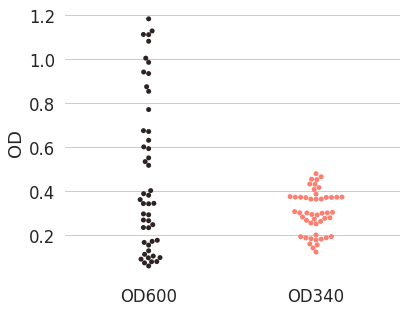

In [13]:
fig, ax = plt.subplots(figsize=(6, 5))
fontsize = 16
sns.set(font_scale = 1.5)
sns.set_style("whitegrid")
sns.swarmplot(data=df, 
              linewidth=0,
              x='Protocol',
              y='Value',
              palette="dark:salmon"
              )
sns.despine(left=True, bottom=True)
ax.set(xlabel=None, ylabel="OD")

fig.savefig(
    f"{user_params['output_file_path']}/swarm_both.png",
    transparent=False,
    bbox_inches="tight",
    dpi=300,
)

In [15]:
line_names = []
for i in range(len(df)):
    line_names.append(str(df['Line Name'][i])[3:-3])
line_names = set(line_names)
line_names = sorted(list(line_names))
# line_names

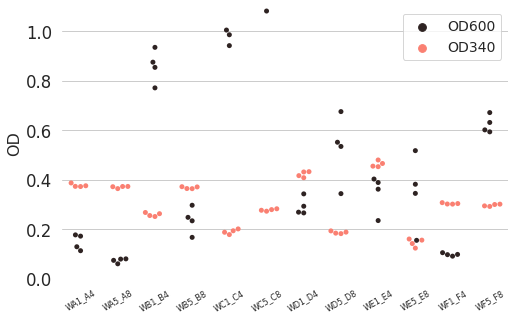

In [16]:
fig, ax = plt.subplots(figsize=(8, 5))
fontsize = 14
sns.set_style("whitegrid")
g = sns.swarmplot(data=df, 
              linewidth=0,
              x='Line Description',
              y='Value',
              hue='Protocol',
              palette="dark:salmon"
              )
g.set_xticklabels(line_names, fontsize=8, rotation = 30)
plt.legend(fontsize=fontsize)
sns.despine(left=True, bottom=True)
ax.set_ylabel("OD", fontsize=fontsize+2)
ax.set_xlabel(None)
plt.ylim([0, 1.1])

fig.savefig(
    f"{user_params['output_file_path']}/swarm_per_design.png",
    transparent=False,
    bbox_inches="tight",
    dpi=300,
)

### Plot OD measurements per well

In [17]:
data_od600 = df[df['Protocol']=='OD600'].pivot('Row', 'Column')['Value']
data_od340 = df[df['Protocol']=='OD340'].pivot('Row', 'Column')['Value']

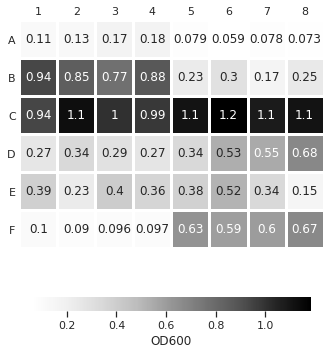

In [18]:
fig = plt.figure(figsize=(10,6))
sns.set(font_scale = 1)
ax = sns.heatmap(data=data_od600, 
                 linewidths=3, 
                 linecolor="w",
                 square= True,
                 cmap="Greys", #Greys, YlGn
                 cbar_kws={"orientation": "horizontal",
                           "shrink": 0.5,
                           'label': 'OD600'
                          },
                 annot = True,
                )
ax.set(xlabel=None, ylabel=None)
plt.yticks(rotation = 0)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.xaxis.tick_top()
fig.savefig(
    f"{user_params['output_file_path']}/OD600.png",
    transparent=False,
    bbox_inches="tight",
    dpi=300,
)

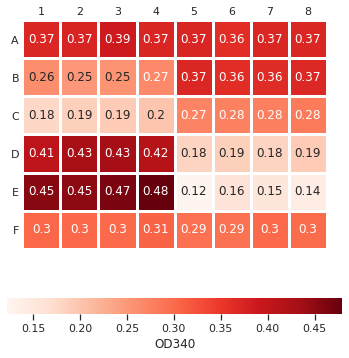

In [19]:
fig = plt.figure(figsize=(10,6))
colormap = sns.color_palette("light:salmon", as_cmap=True)
colormap = "Reds"
sns.set_context("notebook", font_scale=1., rc={"lines.linewidth": 2.5})
ax = sns.heatmap(data_od340, 
                 linewidths=3, 
                 linecolor="w",
                 square= True,
                 cmap=colormap,
                 cbar_kws={"orientation": "horizontal",
                           "shrink": 0.6,
                           'label': 'OD340'
                          },
                 annot = True,
                )
ax.set(xlabel=None, ylabel=None)
plt.yticks(rotation=0)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.xaxis.tick_top()
fig.savefig(
    f"{user_params['output_file_path']}/OD340.png",
    transparent=False,
    bbox_inches="tight",
    dpi=300,
)